quick branch to extract col and row in addition to target/non-target

In [ ]:
%matplotlib inline 
#widget
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
from IPython.display import display
import os

In [7]:
%load_ext autoreload
%autoreload 2

from help_func_new_paradigm import *

In [8]:
# Load the data
base_path = Path.cwd().parent  / "data"/ "ali_paradigm_training" 
df_eeg= pd.read_csv(base_path /'19.07.1.csv')

C:\Users\acer\AppData\Local\Temp\ipykernel_21828\326168795.py:3: DtypeWarning: Columns (16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_eeg= pd.read_csv(base_path /'19.07.1.csv')


In [9]:
df_annotated = annotate_flash_and_target_columns(df_eeg)
df_with_trials = add_trial_count_column_for_flashes_only(df_annotated)
display(df_with_trials[df_with_trials["is_target"].notna() | df_with_trials["which_one"].notna()])

,Time:128Hz,Epoch,AF3,F7,F3,FC5,T7,P7,O1,O2,...,FC6,F4,F8,AF4,Event Id,Event Date,Event Duration,is_target,which_one,trial_count
768,6.000000,24,-24.444117,-25.211375,-5.301085,-10.951753,1.021883,-16.393628,-10.742338,-19.932512,...,-11.387976,-24.839162,-19.003901,-3.310584,32778:32773:32771:33032:32779:33286,6.0000000000:6.0000000000:6.0000000000:6.00000...,0.0000000000:0.0000000000:0.0000000000:0.00000...,0.0,column_2,0.0
794,6.203125,24,-19.141074,-18.210132,-17.934836,-42.685365,-0.026690,-53.102597,-28.076836,-15.951643,...,8.801164,-29.276270,-12.150375,-9.768302,33026:32779:33286,6.2031250000:6.2031250000:6.2031250000,0.0000000000:0.0000000000:0.0000000000,0.0,row_2,0.0
819,6.398438,25,5.348318,41.265216,8.894327,49.505728,-0.689415,40.131571,-0.254246,-7.114999,...,-56.804561,17.716409,-29.929577,1.481632,33031:32779:33285,6.3984375000:6.3984375000:6.3984375000,0.0000000000:0.0000000000:0.0000000000,1.0,column_1,0.0
845,6.601562,26,-18.197398,-63.731902,-24.576815,-55.053249,-1.361823,-46.285844,-20.294320,-23.042025,...,-8.541141,-33.738763,-13.027766,-6.023396,33025:32779:33286,6.6015625000:6.6015625000:6.6015625000,0.0000000000:0.0000000000:0.0000000000,0.0,row_1,0.0
870,6.796875,27,65.999408,39.088641,27.539050,12.240653,-1.306889,-5.278162,10.321012,21.388363,...,53.277873,34.510038,47.846837,25.744163,33033:32779:33286,6.7968750000:6.7968750000:6.7968750000,0.0000000000:0.0000000000:0.0000000000,0.0,column_3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31225,243.945312,975,-3.568225,4.450833,-9.547900,-3.392768,0.208691,0.206112,0.710780,1.614513,...,-11.620159,-14.093943,0.079214,-14.266897,33026:32779:33286,243.9453125000:243.9453125000:243.9453125000,0.0000000000:0.0000000000:0.0000000000,0.0,row_2,9.0
31250,244.140625,976,0.813246,-11.061907,-10.034824,-3.807439,-0.238845,-0.746894,-2.178744,0.289395,...,0.833838,3.586114,-5.620525,-11.551578,33031:32779:33285,244.1406250000:244.1406250000:244.1406250000,0.0000000000:0.0000000000:0.0000000000,1.0,column_1,9.0
31276,244.343750,977,2.717341,-7.825110,-4.996536,-7.992806,-0.170710,-1.427432,-1.936899,0.195351,...,6.053947,4.602879,8.527039,7.200890,33025:32779:33285,244.3437500000:244.3437500000:244.3437500000,0.0000000000:0.0000000000:0.0000000000,1.0,row_1,9.0
31301,244.539062,978,3.017353,-6.079728,-10.189451,-17.669510,-1.798667,3.880522,5.433333,-28.478177,...,-5.531673,-8.265224,-8.072144,-7.421908,33033:32779:33286,244.5390625000:244.5390625000:244.5390625000,0.0000000000:0.0000000000:0.0000000000,0.0,column_3,9.0


In [10]:
'''
# Count occurrences of each flash type (excluding NaNs)
which_one_counts = df_annotated["which_one"].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 4))
which_one_counts.plot(kind='bar')

plt.xlabel("Flashed Row/Column")
plt.ylabel("Count")
plt.title("Frequency of Each Flash Type (which_one)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
'''

'\n# Count occurrences of each flash type (excluding NaNs)\nwhich_one_counts = df_annotated["which_one"].value_counts().sort_index()\n\n# Plot\nplt.figure(figsize=(8, 4))\nwhich_one_counts.plot(kind=\'bar\')\n\nplt.xlabel("Flashed Row/Column")\nplt.ylabel("Count")\nplt.title("Frequency of Each Flash Type (which_one)")\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.grid(axis=\'y\', linestyle=\'--\', alpha=0.6)\nplt.show()\n'

In [11]:
method= "A1"

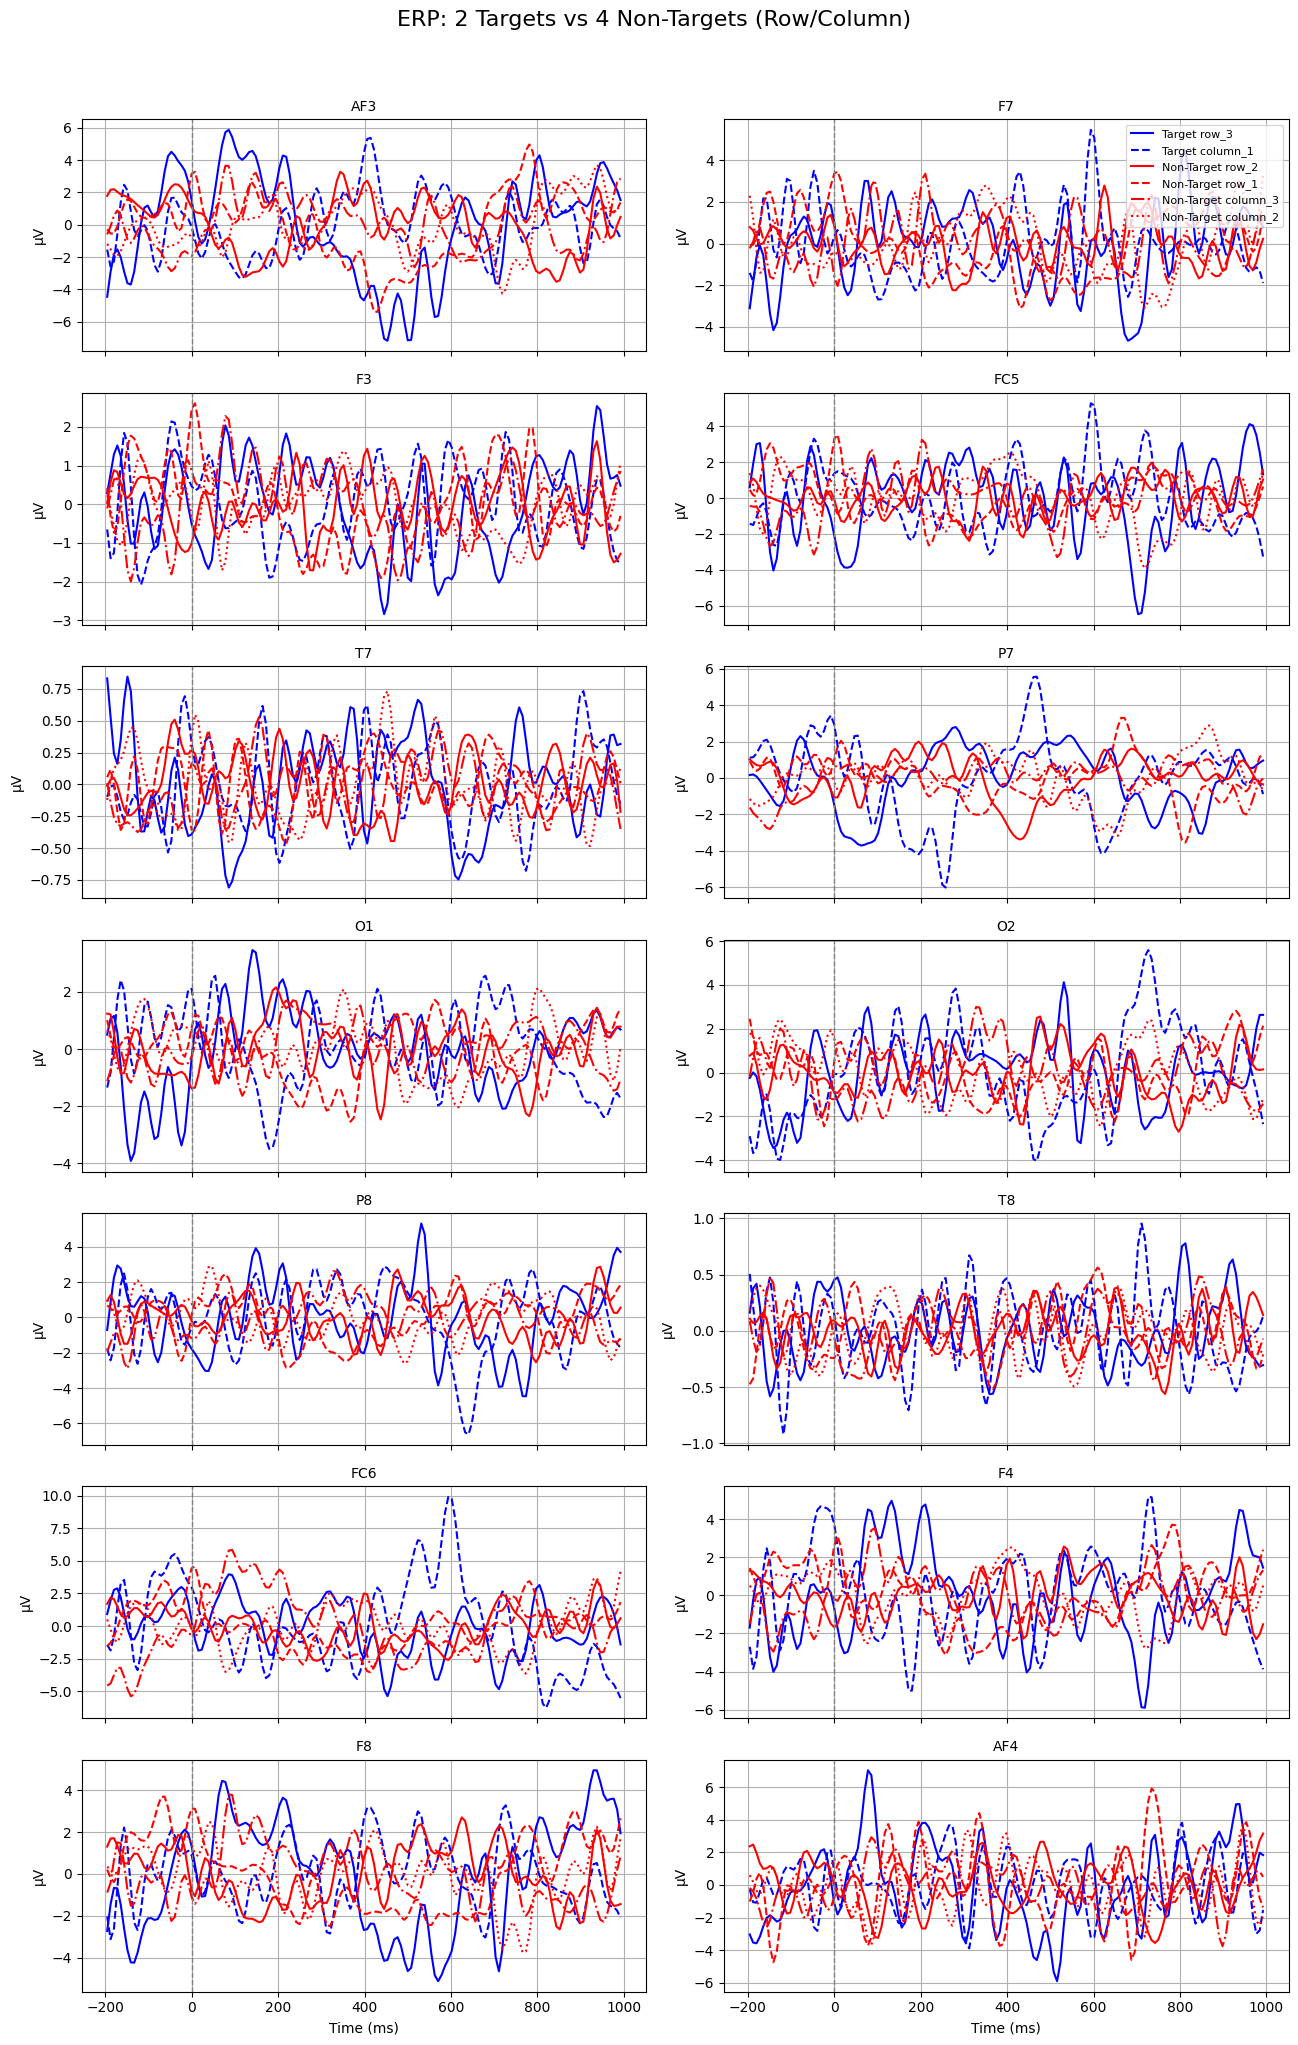

In [12]:
df_flashwise_averages = epoch_grouped_trialwise_average(df_with_trials,
                                                        fs=128, tmin=-0.2, tmax=1.0,
                                                        normalization=method,
                                                        blink_channel_idx=0,
                                                        blink_threshold=120)
# display(df_flashwise_averages)
plot_6_flash_erp_curves(df_flashwise_averages, save_name=f"{method}_1_recording_average_erp_target_vs_nontarget.png")

d:\TUM\a_biosignal_github\Biosignals\ML_try_Ege\help_func_new_paradigm.py:313: DtypeWarning: Columns (16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_eeg = pd.read_csv(file)
d:\TUM\a_biosignal_github\Biosignals\ML_try_Ege\help_func_new_paradigm.py:313: DtypeWarning: Columns (16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_eeg = pd.read_csv(file)
d:\TUM\a_biosignal_github\Biosignals\ML_try_Ege\help_func_new_paradigm.py:313: DtypeWarning: Columns (16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_eeg = pd.read_csv(file)
d:\TUM\a_biosignal_github\Biosignals\ML_try_Ege\help_func_new_paradigm.py:313: DtypeWarning: Columns (16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_eeg = pd.read_csv(file)
d:\TUM\a_biosignal_github\Biosignals\ML_try_Ege\help_func_new_paradigm.py:313: DtypeWarning: Columns (16,17,18) have mixed types. Specify dt

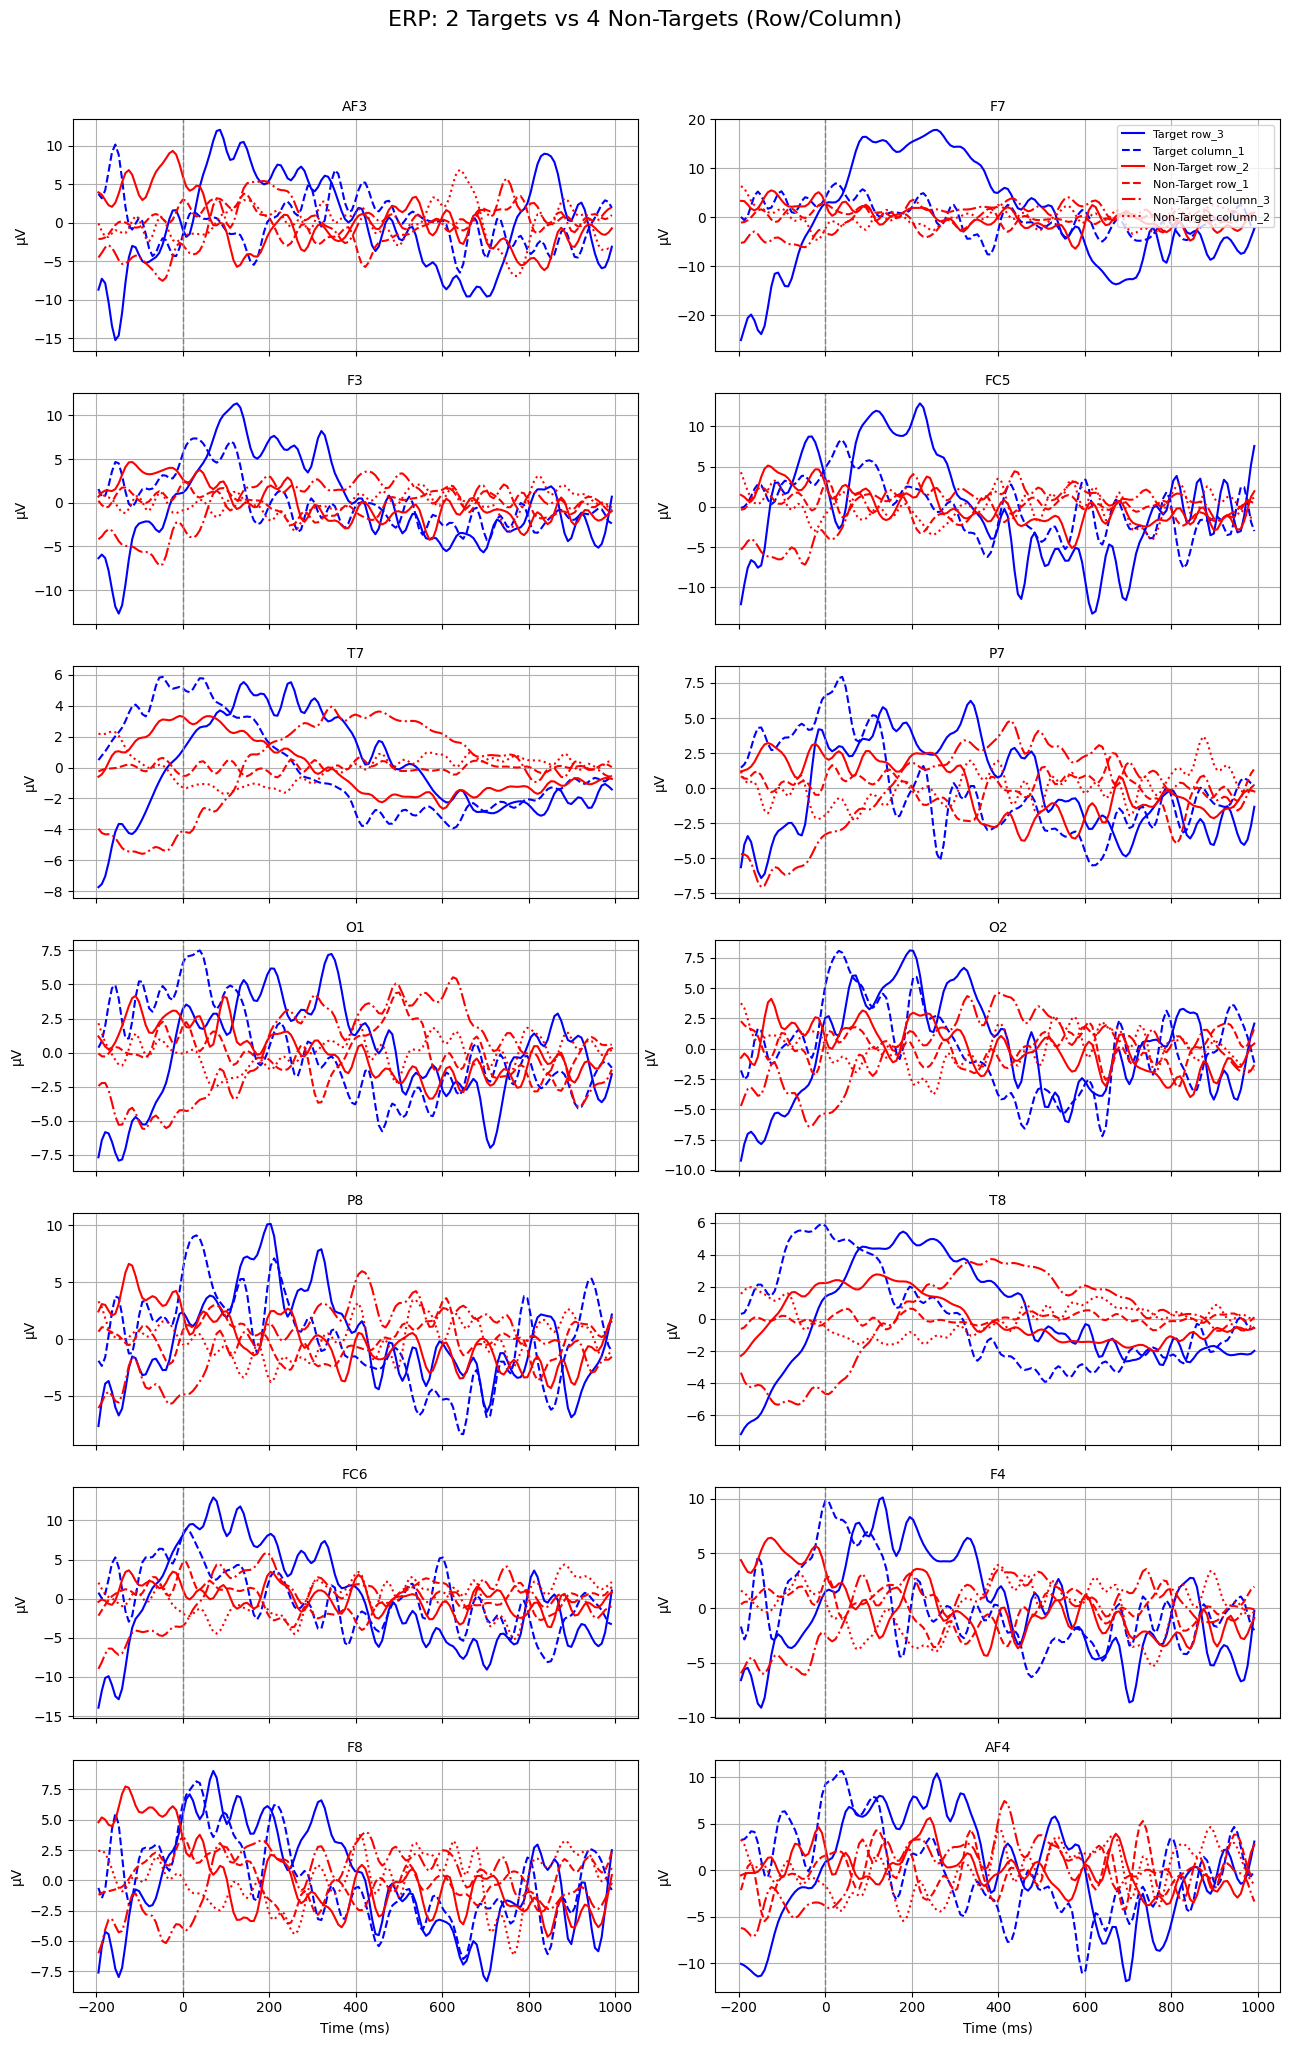

In [13]:
base_path = Path.cwd().parent / "data" / "ali_paradigm_training"
df_combined = process_and_combine_all_csvs(base_path)
plot_6_flash_erp_curves(df_combined, fs=128, tmin=-0.2,save_name=f"{method}_5_recording_average_erp_target_vs_nontarget.png")

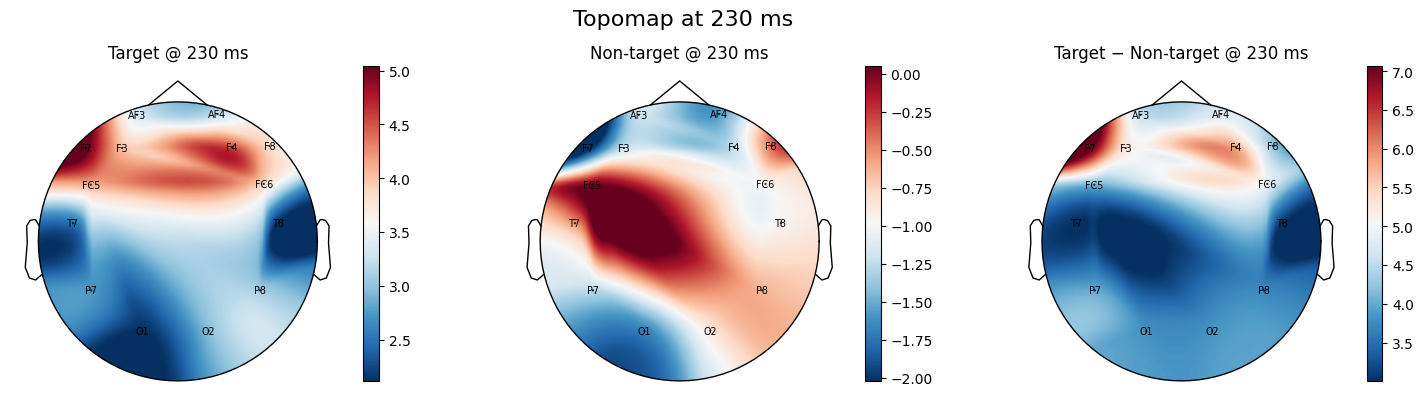

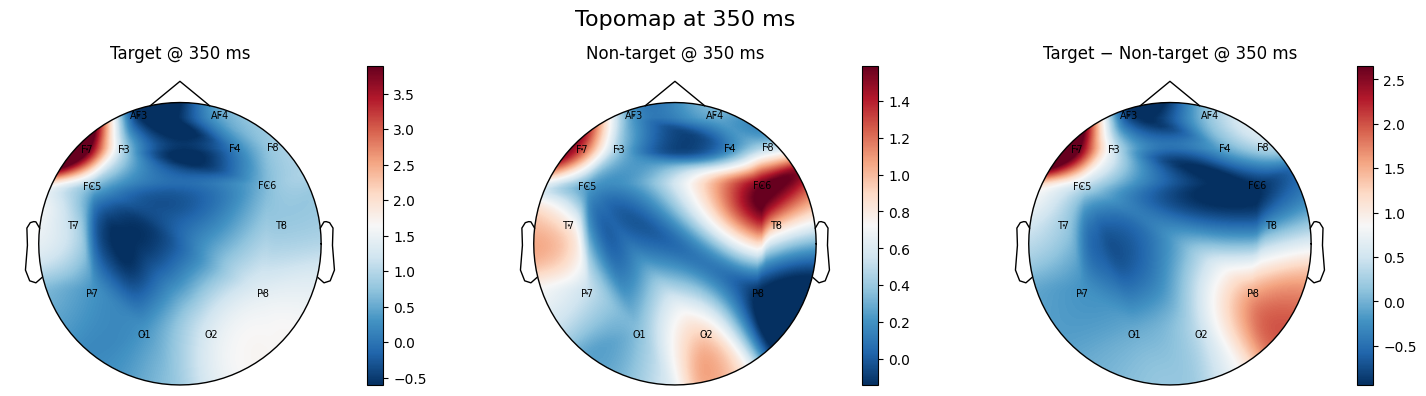

In [14]:
plot_topoplots_from_combined(
    df_combined,
    fs=128,
    tmin=-0.2,
    actual_timepoints_ms=[460, 700],
    display_labels_ms=["230", "350"],
    out_dir="new_paradigm/topoplots",
    addendum=f"{method}_5_recording_average"
)


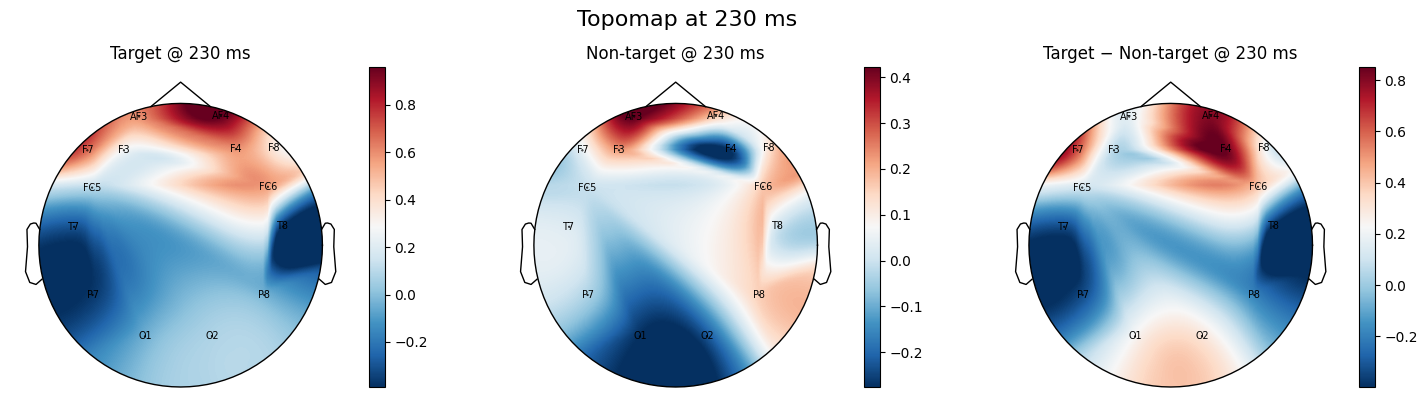

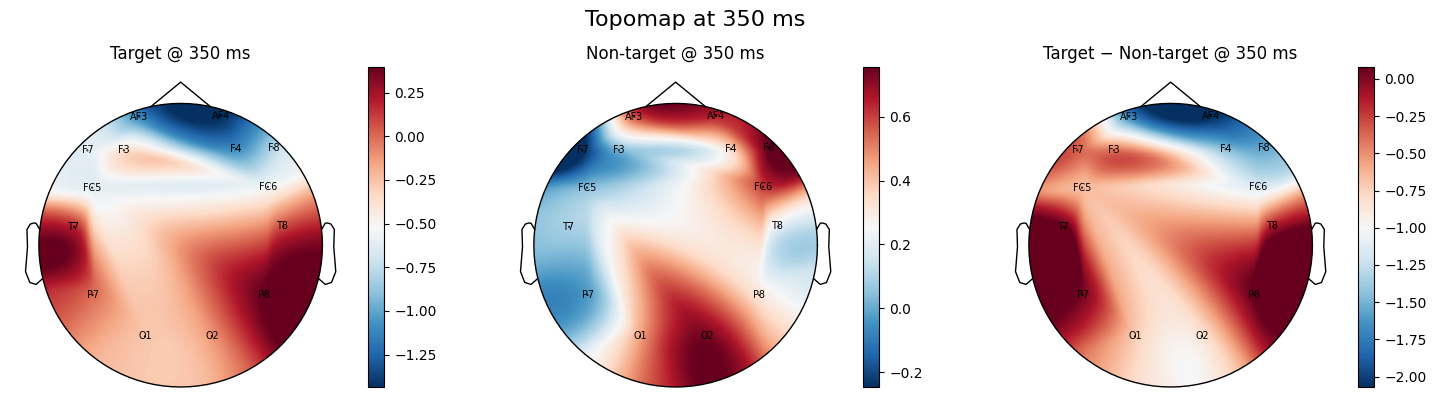

In [15]:
plot_topoplots_from_combined(
    df_flashwise_averages,
    fs=128,
    tmin=-0.2,
    actual_timepoints_ms=[460, 700],
    display_labels_ms=["230", "350"],
    out_dir="new_paradigm/topoplots",
    addendum=f"{method}_1_recording_average"
)
